In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [10]:
df=pd.read_csv('laptop_data.csv')

In [11]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


# THe Dataset Contains small number of data samples

In [103]:
df.shape

(1303, 13)

# Data Preprocessing and Feature Engineering  

In [12]:

#remove unnamed:0
#remove gb from ram and convert into int
#remove kg from weight and convert into float
#perfrom univariate analysis on price --> it is skewed
#df['Company'].value_counts.plot(kind='bar')
#analysis on typename 
#company average laptop price using barplot
# '''
# to extract x and y pixels from  ScreenResolution'
#  new2 = df['ScreenResolution'].str.split('x',n=1,expand=True)
#  new1 = new2[0].str.split(' ',n=-1,expand = False)
#  new1 = new1.apply(lambda x: x[-1])
#  # df['X_res']=pd.Series(new1)
#  df['X_res']=new1
#  df['Y_res'] = new2[1]
#  # print(type(new1))
# '''
#keep finding corr 
#use only the ppi =xsq+ysqunder rootv/inches
#extract touch screen and isl panel asboolean col from df
#drop the col inches and screen resolyutyionm
#from cpu u have to extract i7,i5,i3 and all other intel processors and amd processor and give it name cpu brand 
#memory  should be extracted with 4 diff columns ssd,hdd,hybrid,flash storage 
#in gpu work only with intel,amd,nvidia
#convert the opsys to macos ,windows,other/no os/linux 

In [13]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Dropping unsused Column 

In [14]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [17]:
df['Price']=df['Price'].astype(int)

In [18]:
df['Ram']=df['Ram'].str.replace('GB','')

In [19]:
df['Ram']=df['Ram'].astype(int)

In [20]:
df['Weight']=df['Weight'].str.replace('kg','')

In [21]:
df['Weight']=df['Weight'].astype(float)

# Price is skewed

C:\Users\Sarthak Garg\AppData\Local\Temp\ipykernel_876\708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


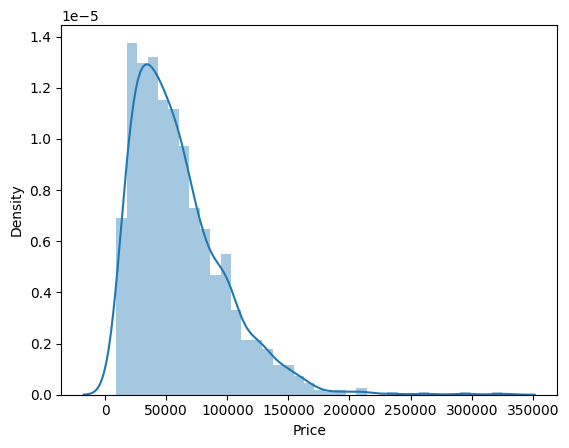

In [22]:
sns.distplot(df['Price'])
plt.show()

# Barplot b/w company name and price

<Axes: xlabel='Company'>

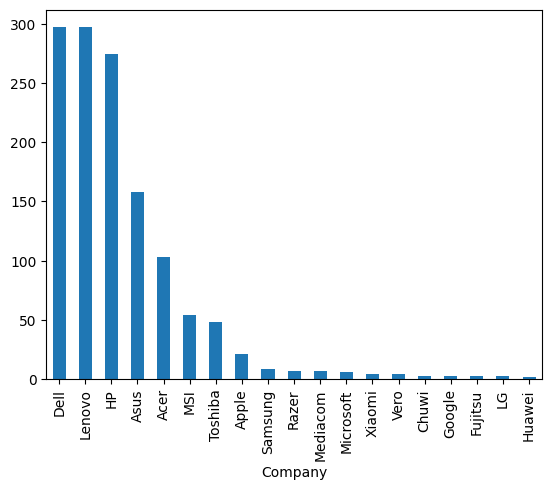

In [23]:
df['Company'].value_counts().plot(kind='bar')

# Barplot b/w company type of laptop  and price

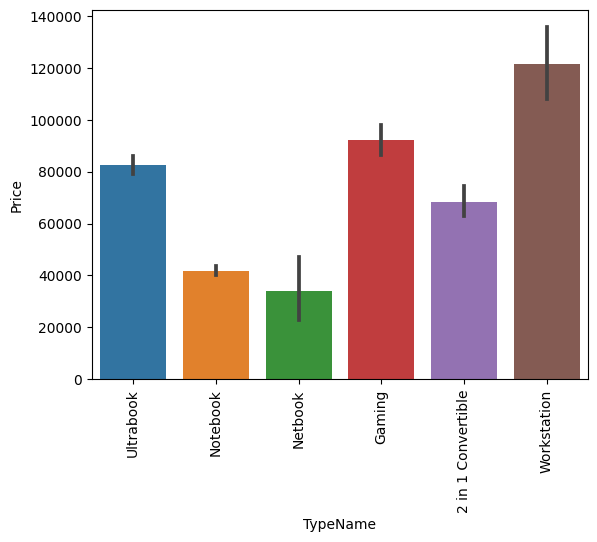

In [24]:
sns.barplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

# Perfroming Anaylsis on Screen Resolution 

In [25]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

#  Extracting X_Resolution and Y_resolution from ScreenResolution

In [26]:
new=df['ScreenResolution'].str.split('x',expand=True)

In [27]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [28]:
df['y_res']=new[1]

In [29]:
df['x_res']=new[0].apply(lambda x: x.split(' ')[-1])

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1600,2560


In [31]:
df['x_res']=df['x_res'].astype('float')

In [32]:
df['y_res']=df['y_res'].astype('float')

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1600.0,2560.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,900.0,1440.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,1080.0,1920.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1800.0,2880.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1600.0,2560.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  y_res             1303 non-null   float64
 12  x_res             1303 non-null   float64
dtypes: float64(4), int32(2), object(7)
memory usage: 122.3+ KB


# Converting X-res,Y-res,Screen_size(Inches) into pixels_per_inch(ppi) 

In [35]:
df['ppi']=(df['x_res']**2+df['y_res']**2)**0.5/df['Inches']

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1600.0,2560.0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,900.0,1440.0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,1080.0,1920.0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1800.0,2880.0,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1600.0,2560.0,226.983005


In [37]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

# Extracting Touchscreen and IPS Display from ScreenResolution

In [38]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [39]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,y_res,x_res,ppi,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1600.0,2560.0,226.983005,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,900.0,1440.0,127.677940,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,1080.0,1920.0,141.211998,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1800.0,2880.0,220.534624,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1600.0,2560.0,226.983005,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  y_res             1303 non-null   float64
 12  x_res             1303 non-null   float64
 13  ppi               1303 non-null   float64
 14  TouchScreen       1303 non-null   int64  
 15  IPS               1303 non-null   int64  
dtypes: float64(5), int32(2), int64(2), object(

In [42]:
df.drop(columns=['ScreenResolution','Inches'],inplace=True)

In [43]:
df.drop(columns=['x_res','y_res'],inplace=True)

In [44]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

# Extracting CPU name from CPU column 

In [45]:
def f(text):
    if  'Intel Core i7' in text :
        return 'Intel Core i7'
    elif  'Intel Core i5' in text :
        return 'Intel Core i5'
    elif  'Intel Core i3' in text :
        return 'Intel Core i3'       
    else:
        if text.split(' ')[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [46]:
df['CpuName']=df['Cpu'].apply(f)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,TouchScreen,IPS,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,226.983005,0,1,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,127.677940,0,0,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,220.534624,0,1,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,226.983005,0,1,Intel Core i5


In [48]:
df.drop(columns=['Cpu'],inplace=True)

In [49]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,TouchScreen,IPS,CpuName
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,226.983005,0,1,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,127.677940,0,0,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,220.534624,0,1,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,226.983005,0,1,Intel Core i5


# Relation Between Price and CpuName

<Axes: xlabel='CpuName', ylabel='Price'>

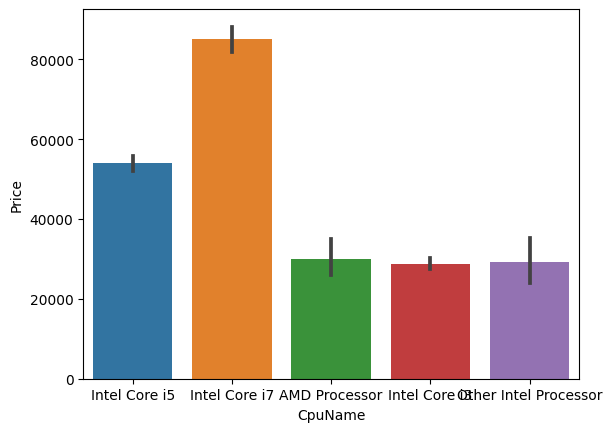

In [50]:
sns.barplot(x='CpuName',y='Price',data=df)

# Extractiong HDD ,SDD from Memory 

In [51]:
import pandas as pd

# Cleaning 'Memory' column and extracting 'first' and 'second'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '').str.replace('TB', '000')

# Extract 'first' and 'second' using regular expressions
new = df['Memory'].str.extract(r'(\d+) (HDD|SSD|Hybrid|Flash Storage)?(?:\+(\d+))?(?: (HDD|SSD|Hybrid|Flash Storage))?')
df['first'] = new[0].fillna(0).astype(int)
df['second'] = new[2].fillna(0).astype(int)

# Marking boolean flags for types in 'first' and 'second'
for storage_type in ['HDD', 'SSD', 'Hybrid', 'Flash Storage']:
    df[f'Layer1{storage_type}'] = new[1].str.contains(storage_type).astype(int)
    df[f'Layer2{storage_type}'] = new[3].str.contains(storage_type).fillna(0).astype(int)

# Calculate the values as needed
df['HDD'] = df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD']
df['SSD'] = df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD']
df['Hybrid'] = df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid']
df['Flash_Storage'] = df['first'] * df['Layer1Flash Storage'] + df['second'] * df['Layer2Flash Storage']

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash Storage'], inplace=True)


In [52]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,TouchScreen,IPS,CpuName,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,226.983005,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,141.211998,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,220.534624,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,226.983005,0,1,Intel Core i5,0,256,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float64
 7   Price          1303 non-null   int32  
 8   ppi            1303 non-null   float64
 9   TouchScreen    1303 non-null   int64  
 10  IPS            1303 non-null   int64  
 11  CpuName        1303 non-null   object 
 12  HDD            1303 non-null   int32  
 13  SSD            1303 non-null   int32  
 14  Hybrid         1303 non-null   int32  
 15  Flash_Storage  1303 non-null   int32  
dtypes: float64(2), int32(6), int64(2), object(6)
memory usage: 132.5+ KB


In [54]:
df.drop(columns=['Memory'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,TouchScreen,IPS,CpuName,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,226.983005,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,141.211998,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,220.534624,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,226.983005,0,1,Intel Core i5,0,256,0,0


In [56]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

# Extracting GPU_Name(Intel,AMD,Nvidia) from GPU column

In [57]:
def fun(s):
     if 'Intel' in s:
         return 'Intel'
     elif 'AMD' in s:
         return 'AMD' 
     elif 'Nvidia' in s:
         return 'Nvidia'

In [58]:
df['Gpu']=df['Gpu'].apply(fun)

In [59]:
# df.head()

In [60]:
df['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

# Extracting OpSys(Windows,MacOS,No OS / Linux / Others) from GPU column

In [61]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [62]:
def func (s):
    if 'Windows' in s:
        return 'Windows'
    elif 'macOS' in s:
        return 'macOS'
    else:
        return 'No OS / Linux / Others'

In [63]:
df['OpSys']=df['OpSys'].apply(func)

In [64]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,TouchScreen,IPS,CpuName,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378,226.983005,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel,No OS / Linux / Others,1.86,30636,141.211998,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195,220.534624,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095,226.983005,0,1,Intel Core i5,0,256,0,0


In [65]:
df['OpSys'].value_counts()

OpSys
Windows                   1125
No OS / Linux / Others     165
macOS                       13
Name: count, dtype: int64

In [66]:
df.rename(columns={'OpSys': 'OS'}, inplace=True)


In [67]:
df.head()

,Company,TypeName,Ram,Gpu,OS,Weight,Price,ppi,TouchScreen,IPS,CpuName,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378,226.983005,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel,No OS / Linux / Others,1.86,30636,141.211998,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195,220.534624,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095,226.983005,0,1,Intel Core i5,0,256,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Gpu            1302 non-null   object 
 4   OS             1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Price          1303 non-null   int32  
 7   ppi            1303 non-null   float64
 8   TouchScreen    1303 non-null   int64  
 9   IPS            1303 non-null   int64  
 10  CpuName        1303 non-null   object 
 11  HDD            1303 non-null   int32  
 12  SSD            1303 non-null   int32  
 13  Hybrid         1303 non-null   int32  
 14  Flash_Storage  1303 non-null   int32  
dtypes: float64(2), int32(6), int64(2), object(5)
memory usage: 122.3+ KB


# Finding correlation Matrix

In [69]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation = numeric_columns.corr()['Price']


In [70]:
# correlation

In [71]:
#very less correlatiuon with Hybrid Flash_Storage   so drop them
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

C:\Users\Sarthak Garg\AppData\Local\Temp\ipykernel_876\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

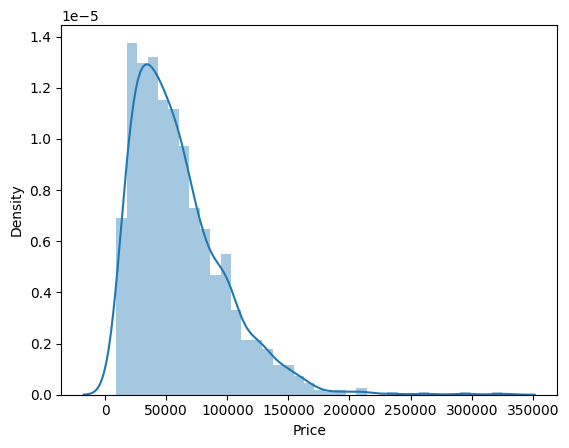

In [72]:
sns.distplot(df['Price'])

# Given Data is skewed ,so will do log transformation on it and standardise it 

C:\Users\Sarthak Garg\AppData\Local\Temp\ipykernel_876\2432714830.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

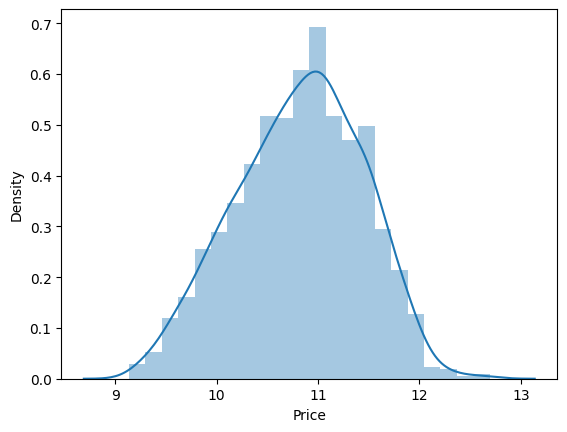

In [73]:
# sns.distplot(df['Price'])
# skewed dataset 
sns.distplot(np.log(df['Price']))

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [75]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [76]:
# x

# Train Test Split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [78]:
x_train

,Company,TypeName,Ram,Gpu,OS,Weight,ppi,TouchScreen,IPS,CpuName,HDD,SSD
409,Lenovo,Notebook,2,Intel,Windows,1.15,135.094211,0,0,Other Intel Processor,0,0
432,Lenovo,Notebook,4,Intel,Windows,1.70,157.350512,0,1,Intel Core i3,0,128
471,HP,Notebook,8,AMD,Windows,1.90,141.211998,0,0,Intel Core i5,500,0
1156,MSI,Gaming,16,Nvidia,Windows,2.70,127.335675,0,0,Intel Core i7,0,256
174,HP,Notebook,8,Nvidia,Windows,2.50,127.335675,0,0,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,Nvidia,Windows,2.40,141.211998,0,0,Intel Core i5,0,256
1130,HP,Notebook,8,Intel,Windows,2.04,100.454670,0,0,Intel Core i7,2000,0
1294,HP,Notebook,6,AMD,Windows,2.04,141.211998,0,0,AMD Processor,0,0
860,Lenovo,Notebook,8,Intel,Windows,2.30,141.211998,0,1,Intel Core i5,1000,0


# Now performing One_Hot_Encoding on columns (Company,TypeName,Gpu,OS,CpuName	) 

In [79]:
step1=ColumnTransformer(transformers=[
    ('c',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

# Training different Models 

# Linear Regression

In [80]:
step2=LinearRegression()

# Pipeleine creation 


In [81]:
pipe=Pipeline([('step1',step1),('step2',step2)])

In [82]:
pipe.fit(x_train,y_train)

C:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('c',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9])])),
                ('step2', LinearRegression())])

In [83]:
y_pred=pipe.predict(x_test)

In [84]:
y_pred.shape

(196,)

# Using R2_score and MAE(Mean ABsolute Error) for checking performance  

In [100]:
print(r2_score(y_pred,y_test))
print('MAE',mean_absolute_error(y_test,y_pred))

0.8519466088397567
MAE 0.1566986283530174


# Ridge Regression

In [86]:
#Ridge
step1= ColumnTransformer(transformers=[('c',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
step2=Ridge(10)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8246050615982508
MAE 0.19653891000867518


C:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Lasso Regression  

In [87]:
#Lasso
step1= ColumnTransformer(transformers=[('c',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
step2=Lasso(0.001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8273519168526478
MAE 0.19553949535842913


C:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# KNN (k=3,best fit )

In [88]:
#KNN
step1= ColumnTransformer(transformers=[('c',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7684871023493667
MAE 0.21604490076184166


# Decision Tree 

In [89]:
#decision trees 
step1= ColumnTransformer(transformers=[('c',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
# step2=DecisionTreeRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8163134566690293
MAE 0.19584494135790817


C:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# SVM

In [90]:
#SVM
step1= ColumnTransformer(transformers=[('c',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)
# step2=DecisionTreeRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8547642260933466
MAE 0.1737260924345718


# Random Forest (Best R2_score)

In [101]:
#random Forest
step1= ColumnTransformer(transformers=[('c',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=400,
                              random_state=3,
                              max_samples=0.7,
                              max_features=0.80
                              )
# step2=DecisionTreeRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Sarthak Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8761822175227504
MAE 0.1566986283530174


In [92]:
import pickle 
pickle.dump(df,open('df.pkl','wb'))

In [93]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [94]:
x

,Company,TypeName,Ram,Gpu,OS,Weight,ppi,TouchScreen,IPS,CpuName,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,226.983005,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,127.677940,0,0,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS / Linux / Others,1.86,141.211998,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,220.534624,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,226.983005,0,1,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,157.350512,1,1,Intel Core i7,0,128
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,276.053530,1,1,Intel Core i7,0,512
1300,Lenovo,Notebook,2,Intel,Windows,1.50,111.935204,0,0,Other Intel Processor,0,0
1301,HP,Notebook,6,AMD,Windows,2.19,100.454670,0,0,Intel Core i7,1000,0


# Dumping the pipe and df of our project 

In [95]:
import pickle 

In [96]:
pickle.dump(df,open('df.pkl','wb'))

In [98]:
pickle.dump(pipe,open('pipe.pkl','wb'))